# Air Traffic Delays -  July 2015
## Final Project - MIDS Python Bridge
### Geoff Stirling, John Schoen, Laura Williams

## Introductory comments

Data is from the US Dept of Transportation, Bureau of Transportation Statistics

This data includes only flights that both depart and arrive in US states or territories.

Air traffic delays are not just an inconvenience to passengers. Last year, airline flight delays and cancellations cost American passengers more than $2 billion in out-of-pocket costs for hotels, meals, alternate travel arrangements, etc. 
We decided to take a closer look at the nature and potential causes of these delays with an analysis of U.S. Department of Transportation data on flight delays for the month of July, 2015, at the height of the summer travel season.

### Links:

SOURCE: https://www.rita.dot.gov/bts/data_and_statistics/by_mode/airline_and_airports/airline_delay.html

Description of the data and definitions:  http://www.transtats.bts.gov/TableInfo.asp?Table_ID=236&DB_Short_Name=On-Time&Info_Only=0<br />

Column names and descriptions: http://www.transtats.bts.gov/Fields.asp?Table_ID=236&SYS_Table_Name=T_ONTIME&User_Table_Name=On-Time%20Performance&Year_Info=1&First_Year=1987&Last_Year=2016&Rate_Info=0&Frequency=Monthly&Data_Frequency=Annual,Quarterly,Monthly<br />


Where we got the data from the US DOT: http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time

The CSV file we downloaded for this project for July 2015 with all available columns lives in Google Drive here: [NEED LINK]



### IMPORT statements

In [1]:
import sys
print(sys.version)
import numpy as np
print("Numpy version:", np.__version__)
import pandas as pd
print("Pandas version:", pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline


3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy version: 1.10.1
Pandas version: 0.17.1


### Read in the csv file with ALL columns for initial data analysis

In [2]:
flight_data = pd.read_csv('Flight_Data_Original.csv')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Note: we are not using columns 77 or 84, so we didn't do anything about this error message from reading in the data.

###  Columns to be included in the file used for data analysis - IN PROGRESS:

* = definitely used in someone's analysis

Year<br \>
Month<br \>
* DayofMonth<br \>
* DayOfWeek<br \>
FlightDate<br \>
* UniqueCarrier<br \>
AirlineID<br \>
Carrier<br \>
* TailNum<br \>
FlightNum<br \>
OriginAirportID<br \>
OriginCityMarketID<br \>
* Origin<br \>
* OriginCityName<br \>
OriginState<br \>
OriginStateName<br \>
DestAirportID<br \>
DestCityMarketID<br \>
* Dest<br \>
* DestCityName<br \> 
DestState<br \>
DestStateName<br \>
* DepDelay<br \>
DepDelayMinutes<br \>
DepDel15<br \>
* ArrDelay<br \>
* ArrDelayMinutes<br \>
* ArrDel15<br \>
* ArrTimeBlk<br \>
CRSElapsedTime<br \>
ActualElapsedTime<br \>
AirTime<br \>
Flights<br \>
Distance<br \>
DistanceGroup<br \>
* CarrierDelay<br \>
* WeatherDelay<br \>
* NASDelay<br \>
* SecurityDelay<br \>
* LateAircraftDelay

### Drop columns not needed for data analysis - IN PROGRESS

In [102]:
fd_filtered = flight_data.drop(['Div5TailNum', 
                                'Div5WheelsOff',
                                'Div5LongestGTime',
                                'Div5TotalGTime',
                                'Div5WheelsOn',
                                'Div5AirportSeqID',
                                'Div5AirportID',
                                'Div5Airport',
                                'Div4TailNum',
                                'Div4WheelsOff',
                                'Div4LongestGTime',
                                'Div4TotalGTime',
                                'Div4WheelsOn',
                                'Div4AirportSeqID',
                                'Div4AirportID',
                                'Div4Airport',
                                'Div3TailNum',
                                'Div3WheelsOff',
                                'Div3LongestGTime',
                                'Div3TotalGTime',
                                'Div3WheelsOn',
                                'Div3AirportSeqID',
                                'Div3AirportID',
                                'Div3Airport',
                                'Div2TailNum',
                                'Div2WheelsOff',
                                'Div2LongestGTime',
                                'Div2TotalGTime',
                                'Div2WheelsOn',
                                'Div2AirportSeqID',
                                'Div2AirportID',
                                'Div2Airport',
                                'Div1TailNum',
                                'Div1WheelsOff',
                                'Div1LongestGTime',
                                'Div1TotalGTime',
                                'Div1WheelsOn',
                                'Div1AirportSeqID',
                                'Div1AirportID',
                                'Div1Airport',
                                'DivDistance',
                                'DivArrDelay',
                                'DivActualElapsedTime',
                                'DivReachedDest',
                                'DivAirportLandings',
                                'LongestAddGTime',
                                'TotalAddGTime',
                                'FirstDepTime',
                                'Diverted',
                                'CancellationCode',
                                'Cancelled',
                                'Unnamed: 109',
                                'Quarter',
                                'OriginAirportSeqID',
                                'OriginStateFips',
                                'OriginWac',
                                'DestAirportSeqID',
                                'DestStateFips',
                                'DestWac',
                                'DepartureDelayGroups',
                                'DepTimeBlk',
                                'TaxiOut',
                                'WheelsOff',
                                'CRSDepTime',
                                'DepTime',
                                'WheelsOn',
                                'TaxiIn',
                                'CRSArrTime',
                                'ArrTime',
                                'ArrivalDelayGroups'],
                                axis=1)



column_list = list(fd_filtered.columns)
for i in column_list:
    print(i)

Year
Month
DayofMonth
DayOfWeek
FlightDate
UniqueCarrier
AirlineID
Carrier
TailNum
FlightNum
OriginAirportID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateName
DestAirportID
DestCityMarketID
Dest
DestCityName
DestState
DestStateName
DepDelay
DepDelayMinutes
DepDel15
ArrDelay
ArrDelayMinutes
ArrDel15
ArrTimeBlk
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


### Set display options for displaying the number of columns

In [18]:
pd.set_option("display.max_columns", 40)
# pd.reset_option("display.max_columns")
pd.get_option("display.max_columns")

40

### Code we used for taking a quick look at the data

In [30]:
# fd_filtered.head()
# fd_filtered.tail(10)
# fd_filtered.size
# fd_filtered.count()
# fd_filtered.index
fd_filtered.describe()

Year   Month     DayofMonth      DayOfWeek      AirlineID  \
count  520718  520718  520718.000000  520718.000000  520718.000000   
mean     2015       7      16.161659       3.936839   19927.278581   
std         0       0       8.918851       1.911859     384.166949   
min      2015       7       1.000000       1.000000   19393.000000   
25%      2015       7       8.000000       2.000000   19790.000000   
50%      2015       7      16.000000       4.000000   19805.000000   
75%      2015       7      24.000000       5.000000   20304.000000   
max      2015       7      31.000000       7.000000   21171.000000   

           FlightNum  OriginAirportID  OriginCityMarketID  DestAirportID  \
count  520718.000000    520718.000000       520718.000000  520718.000000   
mean     2168.096457     12674.475240        31700.974063   12674.179481   
std      1759.948641      1527.548858         1284.588942    1527.535161   
min         1.000000     10135.000000        30070.000000   10135.000000   
25%       723.000000     11292.000000        30615.000000   11292.000000   
50%      1657.000000     12889.000000        31453.000000   12889.000000   
75%      3312.000000     13930.000000        32467.000000   13930.000000   
max      7438.000000     16218.000000        35991.000000   16218.000000   

       DestCityMarketID       DepDelay  DepDelayMinutes       DepDel15  \
count     520718.000000  516211.000000    516211.000000  516211.000000   
mean       31701.028380      11.394664        13.889404       0.212866   
std         1284.615757      37.592895        36.520365       0.409334   
min        30070.000000     -41.000000         0.000000       0.000000   
25%        30615.000000      -4.000000         0.000000       0.000000   
50%        31453.000000      -1.000000         0.000000       0.000000   
75%        32467.000000      10.000000        10.000000       0.000000   
max        35991.000000    1625.000000      1625.000000       1.000000   

            ArrDelay  ArrDelayMinutes       ArrDel15  CRSElapsedTime  \
count  514384.000000    514384.000000  514384.000000   520718.000000   
mean        6.431775        13.546419       0.209235      142.896007   
std        39.426458        35.929741       0.406763       75.972665   
min       -73.000000         0.000000       0.000000       18.000000   
25%       -12.000000         0.000000       0.000000       86.000000   
50%        -4.000000         0.000000       0.000000      124.000000   
75%        10.000000        10.000000       0.000000      175.000000   
max      1636.000000      1636.000000       1.000000      652.000000   

       ActualElapsedTime        AirTime  Flights       Distance  \
count      514384.000000  514384.000000   520718  520718.000000   
mean          138.148580     114.426570        1     841.477279   
std            75.012279      72.772988        0     623.131646   
min            14.000000       7.000000        1      31.000000   
25%            83.000000      61.000000        1     386.000000   
50%           119.000000      95.000000        1     666.000000   
75%           170.000000     145.000000        1    1076.000000   
max           696.000000     639.000000        1    4983.000000   

       DistanceGroup   CarrierDelay   WeatherDelay       NASDelay  \
count  520718.000000  107627.000000  107627.000000  107627.000000   
mean        3.836507      18.781337       2.159941      12.482509   
std         2.449357      44.803007      14.838629      25.643805   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         3.000000       3.000000       0.000000       0.000000   
75%         5.000000      19.000000       0.000000      16.000000   
max        11.000000    1625.000000     836.000000     784.000000   

       SecurityDelay  LateAircraftDelay  
count  107627.000000      107627.000000  
mean        0.063376          25.852072  
std         1.814837     

## Note re: looking at arrival airports

Each flight that was not cancelled or diverted obviously has both a departure airport and an arrival airport.  Most passengers, while they may be agitated by a delay at the departure airport, are rather more inconvenienced by delays in arrival. For this reason, we focused on arrival delays reported at arrival airports. After looking at different ways of evaluating those arrival delays, we did explore the contribution of departure airports to those arrival delays.

# Worst arrival delays

### Total number of delays by arrival airport

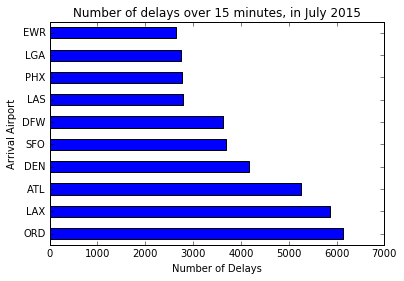

In [16]:
fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                    .sum() \
                    .sort_values(ascending = False) \
                    .head(10) \
                    .plot(kind = 'barh', title='Number of delays over 15 minutes, in July 2015') \
                    .set(xlabel="Number of Delays", ylabel="Arrival Airport")


plt.savefig('TotalDelaysArrival.png')

### Percentage of all flights delayed over 15 minutes, by arrival airport

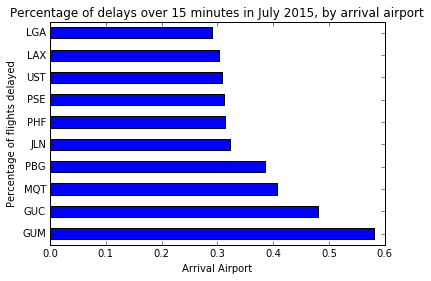

In [17]:
fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                    .sum() \
                    .div(fd_filtered.Dest.value_counts()) \
                    .sort_values(ascending = False) \
                    .head(10) \
                    .plot(kind = 'barh', title='Percentage of delays over 15 minutes in July 2015, ' \
                                               'by arrival airport') \
                    .set(xlabel="Arrival Airport", ylabel="Percentage of flights delayed")
                        
plt.savefig('PercentageDelaysArrival.png')

### Total number of minutes of delay per arrival airport

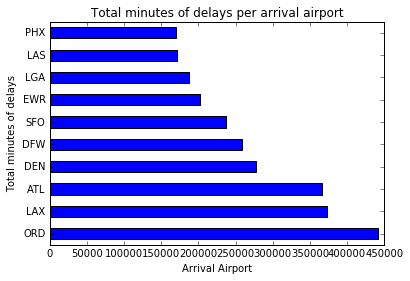

In [23]:
fd_filtered.ArrDelayMinutes.groupby(fd_filtered.Dest) \
                           .sum() \
                           .sort_values(ascending = False) \
                           .head(10) \
                           .plot(kind = 'barh', title='Total minutes of delays per arrival airport')  \
                           .set(xlabel="Arrival Airport", ylabel="Total minutes of delays")  
            
plt.savefig('TotalMinutesArrival.png')

### Average number of minutes of delay, per arrival airport

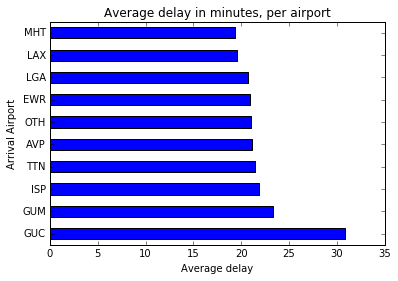

In [27]:
fd_filtered.ArrDelayMinutes.groupby(fd_filtered.Dest) \
                           .mean() \
                           .sort_values(ascending = False) \
                           .head(10) \
                           .plot(kind = 'barh', title='Average delay in minutes, per airport') \
                           .set(xlabel="Average delay", ylabel="Arrival Airport")
                    
plt.savefig('AverageMinutesArrival.png')

### Determining if depature airports disproportionately impact delays at airports with significant arrival delays

For some airports with the largest proportions of delays over 15 minutes:

We determined  if any originating airport disproportionately contributed to the delays of the arrival airport. For instance, maybe Phoenix accounts for 25% of total 15+ min delayed flights to Las Vegas, but represents only 15% of flights to Las Vegas.

The ratio we're looking for, using LAX and number of delays as an example, is this:

Number of delayed flights from an origin airport into LAX (calculated with .sum method) \ all delayed flights at LAX

less

Number of total flights from that origin airport into LAX \ total flights into LAX

GUC = Gunnison, CO

Only two national airports fly into Gunnison, and Denver is disproportionally responsible for delays by 8%.

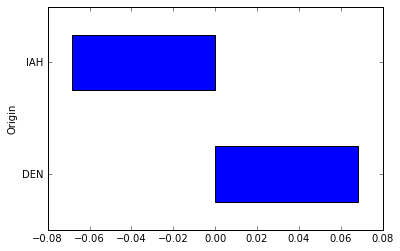

In [60]:
arr_airport = fd_filtered[fd_filtered.Dest == 'GUC']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

arr_airport.groupby('Origin')['ArrDel15'] \
              .sum() \
              .div(arr_airport.ArrDel15.sum()) \
              .subtract(subset_ratio) \
              .sort_values(ascending = False) \
              .head(5) \
              .plot(kind = 'barh')
                
plt.savefig('GUCOriginDelays.png')

LAX = Los Angeles, CA

There are a few originating airports that disproportionately impact Los Angeles's delays, but not by a huge margin.  SFO in San Francisco contributes most to LAX's delays by a margin of about 2.6%

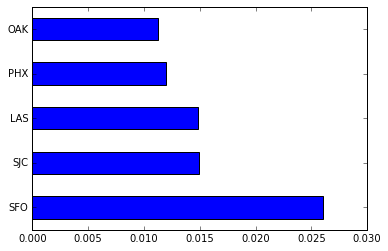

In [36]:
arr_airport = fd_filtered[fd_filtered.Dest == 'LAX']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

arr_airport.groupby('Origin')['ArrDel15'] \
              .sum() \
              .div(arr_airport.ArrDel15.sum()) \
              .subtract(subset_ratio) \
              .sort_values(ascending = False) \
              .head(5) \
              .plot(kind = 'barh')
                
plt.savefig('LAXOriginDelays.png')

GUM = Guam

Honolulu is the only national location that flies into and out of Guam, so there could not be any variance among origin airports for delayed flights arriving at Guam.  

That said, knowing that Honolulu accounts for ALL flights into Guam, we can say with certaintey that there is an almost 60% chance of a delay over 15 minutes when flying from Honolulu to Guam.

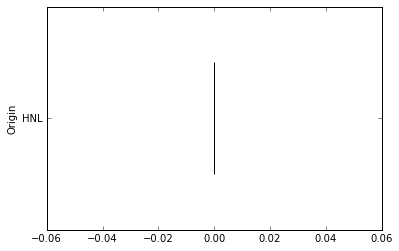

In [61]:
arr_airport = fd_filtered[fd_filtered.Dest == 'GUM']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

arr_airport.groupby('Origin')['ArrDel15'] \
              .sum() \
              .div(arr_airport.ArrDel15.sum()) \
              .subtract(subset_ratio) \
              .sort_values(ascending = False) \
              .head(5) \
              .plot(kind = 'barh')
                
plt.savefig('GUMOriginDelays.png')

In [64]:
# Confirming that the only flights going into Guam are from Honolulu
# Confirmed via Google search as well
arr_airport = fd_filtered[fd_filtered.Dest == 'GUM']
arr_airport.Origin.value_counts()

HNL    31
Name: Origin, dtype: int64

LGA = Laguardia

Miami International Airport disproportionately contributed to delays at LGA by 11%. This dataset does not show where passengers might be connecting to and from, but a good guess would be that international travelers coming in through Miami might contribute to these delays.

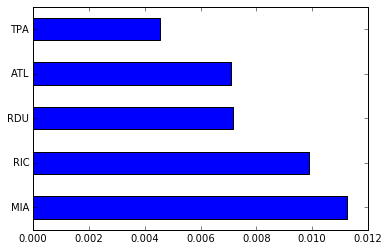

In [51]:
arr_airport = fd_filtered[fd_filtered.Dest == 'LGA']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

arr_airport.groupby('Origin')['ArrDel15'] \
              .sum() \
              .div(arr_airport.ArrDel15.sum()) \
              .subtract(subset_ratio) \
              .sort_values(ascending = False) \
              .head(5) \
              .plot(kind = 'barh')
                
plt.savefig('LGAOriginDelays.png')

New York City's JFK airport contributed disproportionately by 11% to the flights into Puerto Rico.

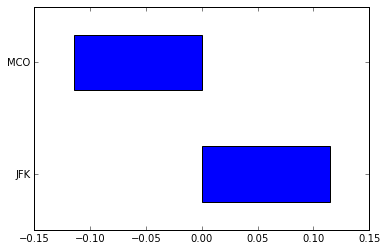

In [66]:
arr_airport = fd_filtered[fd_filtered.Dest == 'PSE']

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

arr_airport.groupby('Origin')['ArrDel15'] \
              .sum() \
              .div(arr_airport.ArrDel15.sum()) \
              .subtract(subset_ratio) \
              .sort_values(ascending = False) \
              .head(5) \
              .plot(kind = 'barh')
                
plt.savefig('PSEOriginDelays.png')

Otherwise, most airports with a large proportional number of flights delayed over 15 mintues did not show any particularly interesting data with this analysis.

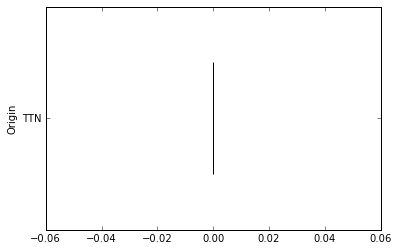

In [69]:
arr_airport = fd_filtered[fd_filtered.Dest == "UST"]

subset_ratio = arr_airport.Origin.value_counts().div(len(arr_airport))

arr_airport.groupby('Origin')['ArrDel15'] \
              .sum() \
              .div(arr_airport.ArrDel15.sum()) \
              .subtract(subset_ratio) \
              .sort_values(ascending = False) \
              .head(5) \
              .plot(kind = 'barh')

-------------
### End of the analysis of origin airports contributing to delays at arrival airports

# Worst delayed flights

In [113]:
fd_filtered.dropna().sort_values(by='ArrDelay').tail(5)

Year  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
47849  2015      7           9          4  2015-07-09            AA   
38485  2015      7          28          2  2015-07-28            AA   
15000  2015      7           8          3  2015-07-08            AA   
3115   2015      7          18          6  2015-07-18            AA   
22263  2015      7          13          1  2015-07-13            AA   

       AirlineID Carrier TailNum  FlightNum  OriginAirportID  \
47849      19805      AA  N798AA         16            14771   
38485      19805      AA  N7BXAA       2334            13930   
15000      19805      AA  N5DKAA        162            12173   
3115       19805      AA  N3DUAA        210            12889   
22263      19805      AA  N3LEAA       1319            12339   

       OriginCityMarketID Origin     OriginCityName OriginState  \
47849               32457    SFO  San Francisco, CA          CA   
38485               30977    ORD        Chicago, IL          IL   
15000               32134    HNL       Honolulu, HI          HI   
3115                32211    LAS      Las Vegas, NV          NV   
22263               32337    IND   Indianapolis, IN          IN   

      OriginStateName  DestAirportID  DestCityMarketID Dest  \
47849      California          12478             31703  JFK   
38485        Illinois          11298             30194  DFW   
15000          Hawaii          12892             32575  LAX   
3115           Nevada          12478             31703  JFK   
22263         Indiana          12892             32575  LAX   

                DestCityName DestState DestStateName  DepDelay  \
47849           New York, NY        NY      New York      1176   
38485  Dallas/Fort Worth, TX        TX         Texas      1223   
15000        Los Angeles, CA        CA    California      1170   
3115            New York, NY        NY      New York      1393   
22263        Los Angeles, CA        CA    California      1625   

       DepDelayMinutes  DepDel15  ArrDelay  ArrDelayMinutes  ArrDel15  \
47849             1176         1      1167             1167         1   
38485             1223         1      1203             1203         1   
15000             1170         1      1212             1212         1   
3115              1393         1      1364             1364         1   
22263             1625         1      1636             1636         1   

      ArrTimeBlk  CRSElapsedTime  ActualElapsedTime  AirTime  Flights  \
47849  2100-2159             353                344      305        1   
38485  1400-1459             153                133      103        1   
15000  2100-2159             337                379      309        1   
3115   1600-1659             307                278      253        1   
22263  2000-2059             268                279      238        1   

       Distance  DistanceGroup  CarrierDelay  WeatherDelay  NASDelay  \
47849      2586             11          1167             0         0   
38485       802              4           804             0         0   
15000      2556             11          1170             0        42   
3115       2248              9          1364             0         0   
22263      1814              8          1625             0        11   

       SecurityDelay  LateAircraftDelay  
47849              0                  0  
38485              0                399  
15000              0                  0  
3115               0                  0  
22263              0                  0

(Note: for this analysis we encountered a number of Nan records, which could also indicate problems with the reliability of this data set.)

In [120]:
fd_filtered.ArrDelay.isnull().value_counts()

False    514384
True       6334
Name: ArrDelay, dtype: int64

### Single longest delay of all flights

In [28]:
fd_filtered[fd_filtered.ArrDelay == fd_filtered.ArrDelay.max()]

Year  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
22263  2015      7          13          1  2015-07-13            AA   

       AirlineID Carrier TailNum  FlightNum  OriginAirportID  \
22263      19805      AA  N3LEAA       1319            12339   

       OriginCityMarketID Origin    OriginCityName OriginState  \
22263               32337    IND  Indianapolis, IN          IN   

      OriginStateName  DestAirportID  DestCityMarketID Dest     DestCityName  \
22263         Indiana          12892             32575  LAX  Los Angeles, CA   

      DestState DestStateName  DepDelay  DepDelayMinutes  DepDel15  ArrDelay  \
22263        CA    California      1625             1625         1      1636   

       ArrDelayMinutes  ArrDel15  CRSElapsedTime  ActualElapsedTime  AirTime  \
22263             1636         1             268                279      238   

       Flights  Distance  DistanceGroup  CarrierDelay  WeatherDelay  NASDelay  \
22263        1      1814              8          1625             0        11   

       SecurityDelay  LateAircraftDelay  
22263              0                  0

# Beating the clock

### Departure that left the earliest before its scheduled departure time

In [32]:
fd_filtered[fd_filtered.ArrDelay == fd_filtered.ArrDelay.min()]

Year  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
76729  2015      7           4          6  2015-07-04            AS   

       AirlineID Carrier TailNum  FlightNum  OriginAirportID  \
76729      19930      AS  N513AS          3            11278   

       OriginCityMarketID Origin  OriginCityName OriginState OriginStateName  \
76729               30852    DCA  Washington, DC          VA        Virginia   

       DestAirportID  DestCityMarketID Dest DestCityName DestState  \
76729          14747             30559  SEA  Seattle, WA        WA   

      DestStateName  DepDelay  DepDelayMinutes  DepDel15  ArrDelay  \
76729    Washington       -13                0         0       -73   

       ArrDelayMinutes  ArrDel15  CRSElapsedTime  ActualElapsedTime  AirTime  \
76729                0         0             366                306      287   

       Flights  Distance  DistanceGroup  CarrierDelay  WeatherDelay  NASDelay  \
76729        1      2329             10           NaN           NaN       NaN   

       SecurityDelay  LateAircraftDelay  
76729            NaN                NaN

Five flights that left the earliest:

In [122]:
fd_filtered.sort_values(by='ArrDelay').head(5)

Year  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
76729  2015      7           4          6  2015-07-04            AS   
80490  2015      7          10          5  2015-07-10            AS   
47515  2015      7          19          7  2015-07-19            AA   
245    2015      7          11          6  2015-07-11            AA   
86507  2015      7          28          2  2015-07-28            AS   

       AirlineID Carrier TailNum  FlightNum  OriginAirportID  \
76729      19930      AS  N513AS          3            11278   
80490      19930      AS  N596AS        729            12264   
47515      19805      AA  N794AA          2            12892   
245        19805      AA  N3JMAA         45            12478   
86507      19930      AS  N468AS         11            11618   

       OriginCityMarketID Origin   OriginCityName OriginState OriginStateName  \
76729               30852    DCA   Washington, DC          VA        Virginia   
80490               30852    IAD   Washington, DC          VA        Virginia   
47515               32575    LAX  Los Angeles, CA          CA      California   
245                 31703    JFK     New York, NY          NY        New York   
86507               31703    EWR       Newark, NJ          NJ      New Jersey   

       DestAirportID  DestCityMarketID Dest  DestCityName DestState  \
76729          14747             30559  SEA   Seattle, WA        WA   
80490          14747             30559  SEA   Seattle, WA        WA   
47515          12478             31703  JFK  New York, NY        NY   
245            14747             30559  SEA   Seattle, WA        WA   
86507          14747             30559  SEA   Seattle, WA        WA   

      DestStateName  DepDelay  DepDelayMinutes  DepDel15  ArrDelay  \
76729    Washington       -13                0         0       -73   
80490    Washington       -10                0         0       -68   
47515      New York        -4                0         0       -68   
245      Washington        -3                0         0       -65   
86507    Washington       -10                0         0       -64   

       ArrDelayMinutes  ArrDel15 ArrTimeBlk  CRSElapsedTime  \
76729                0         0  2100-2159             366   
80490                0         0  2100-2159             369   
47515                0         0  1700-1759             355   
245                  0         0  2200-2259             395   
86507                0         0  2000-2059             390   

       ActualElapsedTime  AirTime  Flights  Distance  DistanceGroup  \
76729                306      287        1      2329             10   
80490                311      284        1      2306             10   
47515                291      273        1      2475             10   
245                  333      307        1      2422             10   
86507                336      314        1      2402             10   

       CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
76729           NaN           NaN       NaN            NaN                NaN  
80490           NaN           NaN       NaN            NaN                NaN  
47515           NaN           NaN       NaN            NaN                NaN  
245             NaN           NaN       NaN            NaN                NaN  
86507           NaN           NaN       NaN            NaN                NaN

### Number of flights with over 10 hour (600 minutes) delays

In [80]:
fd_filtered[fd_filtered.ArrDelay  > 600].sort_values(by='ArrDelay')

Year  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
81274   2015      7          16          4  2015-07-16            AS   
505332  2015      7           6          1  2015-07-06            EV   
444830  2015      7          27          1  2015-07-27            DL   
90466   2015      7           7          2  2015-07-07            AS   
455220  2015      7          29          3  2015-07-29            DL   
385181  2015      7           9          4  2015-07-09            UA   
483505  2015      7          16          4  2015-07-16            DL   
458244  2015      7          31          5  2015-07-31            DL   
316654  2015      7          12          7  2015-07-12            F9   
260512  2015      7          15          3  2015-07-15            HA   
321880  2015      7          23          4  2015-07-23            OO   
260431  2015      7          27          1  2015-07-27            HA   
86640   2015      7          28          2  2015-07-28            AS   
9325    2015      7          12          7  2015-07-12            AA   
423024  2015      7          19          7  2015-07-19            DL   
269576  2015      7          31          5  2015-07-31            MQ   
516022  2015      7           5          7  2015-07-05            F9   
301416  2015      7          17          5  2015-07-17            OO   
516023  2015      7           5          7  2015-07-05            F9   
130002  2015      7           1          3  2015-07-01            DL   
443786  2015      7          26          7  2015-07-26            DL   
390936  2015      7           7          2  2015-07-07            DL   
325636  2015      7          26          7  2015-07-26            OO   
21100   2015      7          13          1  2015-07-13            AA   
343214  2015      7           4          6  2015-07-04            OO   
426635  2015      7          18          6  2015-07-18            DL   
309635  2015      7          19          7  2015-07-19            OO   
431424  2015      7          21          2  2015-07-21            DL   
302305  2015      7          28          2  2015-07-28            OO   
41159   2015      7          31          5  2015-07-31            AA   
...      ...    ...         ...        ...         ...           ...   
42633   2015      7          27          1  2015-07-27            AA   
37754   2015      7          31          5  2015-07-31            AA   
78195   2015      7           5          7  2015-07-05            AS   
2228    2015      7           1          3  2015-07-01            AA   
488773  2015      7          22          3  2015-07-22            EV   
346289  2015      7          26          7  2015-07-26            OO   
3667    2015      7          25          6  2015-07-25            AA   
11763   2015      7           3          5  2015-07-03            AA   
31977   2015      7           4          6  2015-07-04            AA   
28254   2015      7          13          1  2015-07-13            AA   
16672   2015      7          19          7  2015-07-19            AA   
327415  2015      7          17          5  2015-07-17            OO   
37634   2015      7          31          5  2015-07-31            AA   
432138  2015      7          22          3  2015-07-22            DL   
456151  2015      7          30          4  2015-07-30            DL   
324836  2015      7           2          4  2015-07-02            OO   
42831   2015      7          10          5  2015-07-10            AA   
47991   2015      7          18          6  2015-07-18            AA   
434974  2015      7          17          5  2015-07-17            DL   
271182  2015      7           6          1  2015-07-06            MQ   
118981  2015      7           1          3  2015-07-01            DL   
43055   2015      7           6          1  2015-07-06            AA   
128917  2015      7           5          7  2015-07-05            DL   
407145  2015      7          13          1  2015

# Evaluating flights by major metropolitan areas

#### SF Bay Area Flights: Average Delay by Airport

#### Takeaway: If you're flying to the SF Bay Area in July and avoiding long delays is your goal, you're pretty much safe going to any of the three major area airports. SFO wins by a hair, but they're all very close.

In [81]:
sf = fd_filtered.groupby(['Dest']).ArrDelay.mean()

print("San Francisco:",sf["SFO"],"minutes")
print("Oakland:",sf["OAK"],"minutes")
print("San Jose:",sf["SJC"],"minutes")

San Francisco: 9.05751247979 minutes
Oakland: 10.2854713314 minutes
San Jose: 9.35413333333 minutes


#### NYC Area Flights: Average Delay by Airport

#### Takeaway: If you're flying to the NYC Area in July and avoiding long delays is your goal, you're best bet by a longshot is to fly into JFK.

In [83]:
nyc = fd_filtered.groupby(['Dest']).ArrDelay.mean()

print("Newark:",sf["EWR"],"minutes")
print("JFK:",sf["JFK"],"minutes")
print("LaGuardia:",sf["LGA"],"minutes")

Newark: 13.178526971 minutes
JFK: 2.9417443774 minutes
LaGuardia: 13.9470899471 minutes


We worked on trying to figure out another way using the City Market to get the information, but decided the above code was the most efficient to get what we were looking at.

In [92]:
fd_filtered.groupby(['DestCityMarketID', 'Dest']).ArrDelay.mean()

DestCityMarketID  Dest
30070             ADQ     -2.981818
30073             SCC      2.618421
30107             BRW      4.753623
30113             BET      4.341176
30135             ABE      3.640351
30136             ABI     -1.277512
30140             ABQ      7.314623
30141             ABR      2.459016
30146             ABY     12.532468
30154             ACK     -0.302158
30155             ACT     11.783784
30157             ACV     10.758333
30158             ACY     14.336283
30165             ADK     -6.333333
30185             AEX      7.692833
30189             COS     11.541401
30194             DAL      6.393425
                  DFW      3.241671
30198             PIT      7.180419
30208             AGS      3.574661
30245             AKN     -0.806452
30255             HSV      2.907363
30257             ALB     12.301700
30268             ALO      4.827586
30279             AMA      6.673333
30285             DRO     -1.058537
30299             ANC      7.544971
30325

#### SF Bay Area Flights: Percentage of flights by airport with a 15+ minutes delay

#### Takeaway: If you're flying to the SF Bay Area in July and seeking the airport that's least likely to have a delay, all three airports have a very similar delay (15+ minutes) profile. Oakland wins by just tenths of a percent, but you're practically as likely to be delayed flying into any of the three SF Bay Area airports.

In [88]:
sf_ratio = fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                               .sum() \
                               .div(fd_filtered.Dest.value_counts()) \
        
print("San Francisco:",str(sf_ratio["SFO"] * 100) + "%")
print("Oakland:",str(sf_ratio["OAK"] * 100) + "%")
print("San Jose:",str(sf_ratio["SJC"] * 100) + "%")

San Francisco: 25.52130239%
Oakland: 23.4494274809%
San Jose: 23.6938349007%


#### Takeaway: If you're flying to the NYC Area in July and seeking the airport that's least likely to have a delay (15+ minues), JFK is your best bet. While the ratio of delayed flights is in a tight range for these three aiports, you would want to

In [93]:
nyc_ratio = fd_filtered.ArrDel15.groupby(fd_filtered.Dest) \
                                .sum() \
                                .div(fd_filtered.Dest.value_counts()) \
         
print("Newark:",nyc_ratio["EWR"])
print("JFK:",nyc_ratio["JFK"])
print("LaGuardia:",nyc_ratio["LGA"])

Newark: 0.267460637868
JFK: 0.205044928007
LaGuardia: 0.290026385224


# Exploration re: specific routes between major cities

#### Exploration Question: 
If you have to plan a flight from Chicago to Seattle, what carrier should you take to have the best chance of avoiding a delayed arrival (15+ minutes)?

In [94]:
#fd_filtered["Origin"].groupby(fd_filtered.Origin)
df = fd_filtered.filter(like="ORD").value_counts()



AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [95]:
ds = fd_filtered["Origin"].groupby(fd_filtered["Origin"])

ds.count()


Origin
ABE      232
ABI      211
ABQ     2045
ABR       62
ABY       77
ACK      139
ACT      149
ACV      122
ACY      341
ADK        9
ADQ       58
AEX      299
AGS      221
AKN       31
ALB      716
ALO       58
AMA      454
ANC     2086
APN       54
ASE      261
ATL    33735
ATW      315
AUS     4301
AVL      342
AVP      145
AZO      130
BDL     1842
BET       85
BFL      257
BGM       61
       ...  
SPI      154
SPS      122
SRQ      241
STL     4613
STT      396
STX      101
SUN      131
SUX       58
SWF       62
SYR      538
TLH      284
TOL       91
TPA     5853
TRI      195
TTN      279
TUL     1285
TUS     1251
TVC      380
TWF       89
TXK       92
TYR      233
TYS      706
UST       13
VLD       87
VPS      540
WRG       62
WYS       53
XNA      933
YAK       62
YUM      177
dtype: int64

## Best Day To Fly

Wednesday was the worst day for delays, with an average of nearly 10 minutes per flight, while Sunday was the best day, with less than three minutes delay per flight.

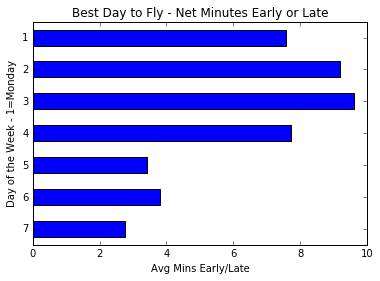

In [123]:
fd_filtered["ArrDelay"].groupby(fd_filtered["DayOfWeek"]) \
                                   .mean() \
                                   .sort_index(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Net Minutes Early or Late') \
                                   .set(xlabel="Avg Mins Early/Late", ylabel="Day of the Week - 1=Monday")\




# Arrive early: Fly on the Fourth of July

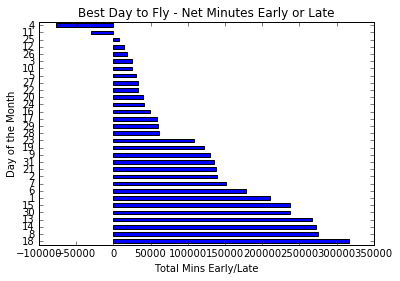

In [96]:
fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                       .sum() \
                       .sort_values(ascending = False) \
                       .plot(kind = 'barh', title='Best Day to Fly - Net Minutes Early or Late') \
                       .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")


plt.savefig('BestDayToFly.png')

Sum vs. mean for the evaluating the day of the month didn't return substantially different results.

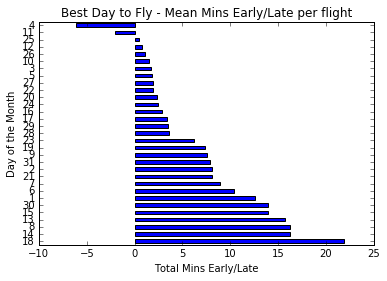

In [105]:
fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Mean Mins Early/Late per flight') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")



July 4, 2015 also produced the best single "under-time" record in our dataset.

[<matplotlib.text.Text at 0x10a835d68>, <matplotlib.text.Text at 0x10ab91588>]

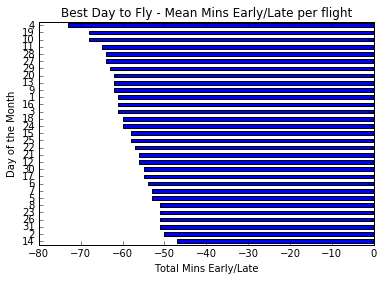

In [124]:
fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                                   .min() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Mean Mins Early/Late per flight') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")


# Watch out for thunderstorms

The worst total delays occured on the 18th of July, a Saturday, which is typically one of the least-delayed days of the week. So what happened on the 18th? 

[<matplotlib.text.Text at 0x10a81d3c8>, <matplotlib.text.Text at 0x10a922588>]

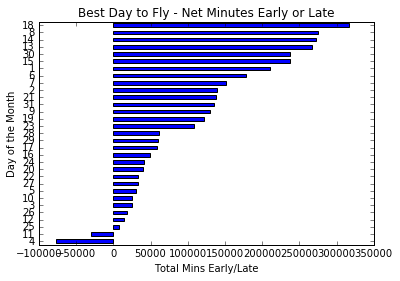

In [126]:
fd_filtered["ArrDelay"].groupby(fd_filtered["DayofMonth"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .plot(kind = 'barh', title='Best Day to Fly - Net Minutes Early or Late') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Day of the Month")

Turns out that was a bad day for thunderstorms, based on the NOAA map for that day.

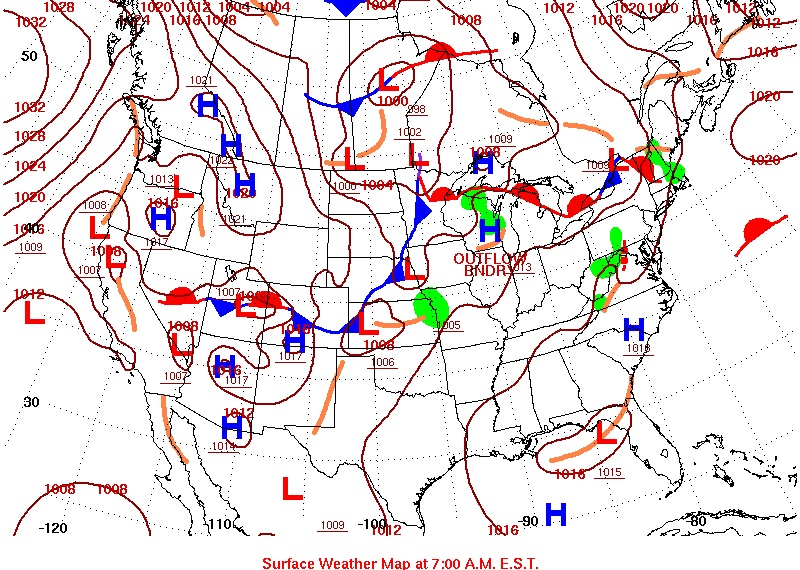

In [127]:
from IPython.display import Image
Image(filename='Hi-LoMap_20150718.jpg')

# Beater airplanes

This one calls out the worst airplanes in the sky. (Not that you can look up tail numbers on Expedia.)

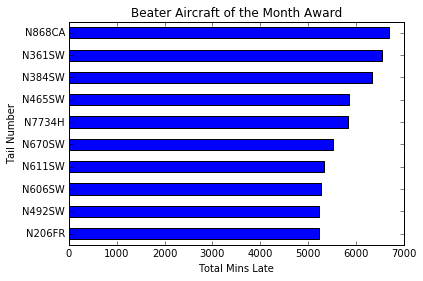

In [98]:
fd_filtered["ArrDelay"].groupby(fd_filtered["TailNum"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .tail(10) \
                                   .plot(kind = 'barh', title='Beater Aircraft of the Month Award') \
                                   .set(xlabel="Total Mins Late", ylabel="Tail Number")


plt.savefig('WorstPlanes.png')

# Worst airlines

### Average delay per airline carrier

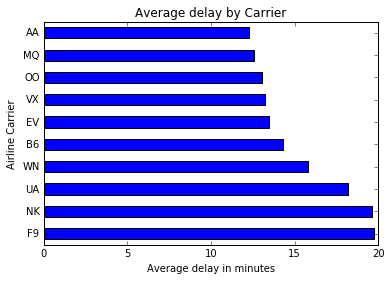

In [101]:
fd_filtered.ArrDelayMinutes.groupby(fd_filtered.UniqueCarrier) \
                           .mean() \
                           .sort_values(ascending = False) \
                           .head(10) \
                           .plot(kind = 'barh', title='Average delay by Carrier') \
                           .set(xlabel="Average delay in minutes", ylabel="Airline Carrier")
                    
plt.savefig('AverageMinutesCarrier.png')

This on calls out airlines for total minutes of delay.

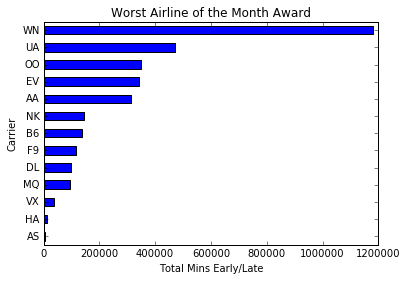

In [100]:
 fd_filtered["ArrDelay"].groupby(fd_filtered["UniqueCarrier"]) \
                                   .sum() \
                                   .sort_values(ascending = True) \
                                   .plot(kind = 'barh', title='Worst Airline of the Month Award') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Carrier")


plt.savefig('AirlinesTotalDelayMinutes.png')

# To get there early, get up early 

No matter what day of the week you want to fly, you'll get their sooner, on average, if you book the earliest flight possible.

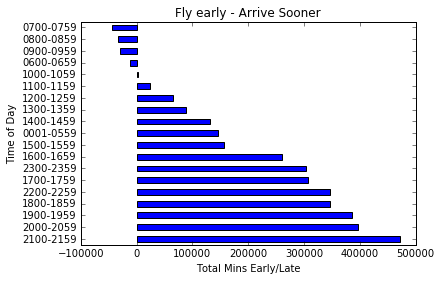

In [104]:
fd_filtered["ArrDelay"].groupby(fd_filtered["ArrTimeBlk"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .plot(kind = 'barh', title='Fly early - Arrive Sooner') \
                                   .set(xlabel="Total Mins Early/Late", ylabel="Time of Day")


plt.savefig('TimeOfDay.png')

We considered evaluating cause of delays, but the percentage of NaN values for all causes of delay (46.11% for all delay causes) was too high for this data to be very meaningful.

In [157]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].CarrierDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].CarrierDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Carrier Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Carrier Delay is 46.1102459981%


In [158]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].WeatherDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].WeatherDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Weather Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Weather Delay is 46.1102459981%


In [159]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].NASDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].NASDelay.isnull().value_counts()[0]
        
print("Percentage of null values for NAS Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for NAS Delay is 46.1102459981%


In [160]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].SecurityDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].SecurityDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Security Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Security Delay is 46.1102459981%


In [161]:
null_val = fd_filtered[fd_filtered.ArrDelay > 0].LateAircraftDelay.isnull().value_counts()[1]

not_null_val = fd_filtered[fd_filtered.ArrDelay > 0].LateAircraftDelay.isnull().value_counts()[0]
        
print("Percentage of null values for Late Aircraft Delay is " + str((null_val/(null_val + not_null_val)) * 100) + '%')

Percentage of null values for Late Aircraft Delay is 46.1102459981%
